In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization,\
    Activation
from tensorflow.keras.optimizers import Adam

# Chargement des sets train/test/valid
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_valid, X_train = X_train[:5000] / 255, X_train[5000:] / 255
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255

input_shape = (X_train.shape[1], X_train.shape[2])

2023-12-14 18:27:21.568776: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-14 18:27:21.590887: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-14 18:27:21.590912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-14 18:27:21.591794: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-14 18:27:21.596211: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def digits_benchmark(compiled_model, epochs=20, batch_size=200, validation_split=.2):
    # Loading dependencies
    from tensorflow.keras.datasets import mnist
    from tensorflow.keras.utils import to_categorical
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import classification_report, confusion_matrix

    # Loading MNIST DIGITS train/test/valid
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train / 255
    X_test = X_test / 255
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)
    
    print(model.summary())
    
    # Fitting the model
    training_history = model.fit(X_train, y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             validation_split=validation_split,
                             verbose=0)
    
    # Plotting Accuracy
    train_acc = training_history.history['accuracy']
    val_acc = training_history.history['val_accuracy']
    sns.lineplot(x=range(len(train_acc)), y=train_acc, label='Training accuracy')
    sns.lineplot(x=range(len(train_acc)), y=val_acc, label='Validation accuracy', color='red')
    plt.grid()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.xticks(range(len(train_acc)))
    plt.show()
    
    # Classification report
    y_test_class = y_test.argmax(axis=1)
    test_pred = model.predict(X_test)
    test_pred_class = test_pred.argmax(axis=1)
    print(classification_report(y_test_class, test_pred_class))
    
    cm = confusion_matrix(y_test_class, test_pred_class)
    sns.heatmap(cm, cmap='Greens', annot=True, fmt='d', annot_kws={'size': 8})
    

### **Paramétrage des initializers et fonctions d'activation**

**Kernel Initializers**:
- **glorot**: Default 
- **he_normal**:
- **lecun_uniform**:

In [3]:
model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(units=128, activation='relu', kernel_initializer='he_normal'),
    Dense(units=256, activation='selu', kernel_initializer='lecun_uniform'),
    Dense(units=10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-12-14 18:27:22.780214: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-14 18:27:22.808601: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


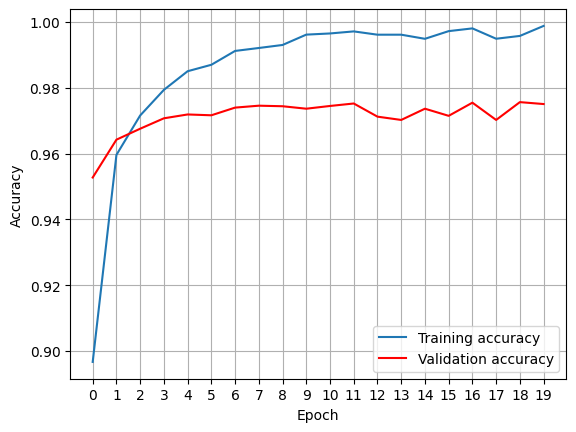

313/313 [==============================] - 0s 374us/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       1.00      0.96      0.98       892
           6       0.98      0.99      0.99       958
           7       0.97      0.98      0.97      1028
           8       0.95      0.98      0.96       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



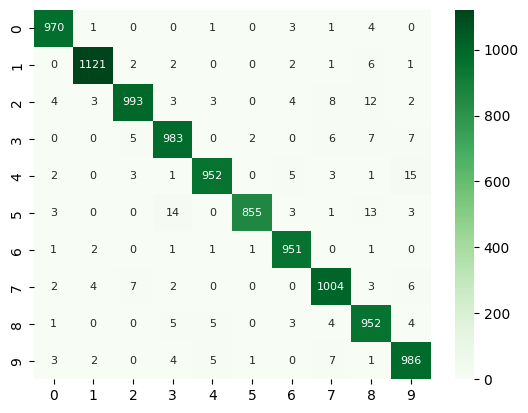

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
digits_benchmark(model)

#### **Batch Normalization**

> Adding a normalization layer right after input makes dataset normalization unnecessary

As expected, half of BatchNormalization parameters are non-trainable corresponding to batch $\mu$, and $\sigma$.  
The other two parameters (rescale $\gamma$ and offset $\beta$) are learned.

In [5]:
model = Sequential([
    Flatten(input_shape=input_shape),
    BatchNormalization(),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dense(units=10, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_2 (Bat  (None, 256)              

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_2 (Bat  (None, 256)              

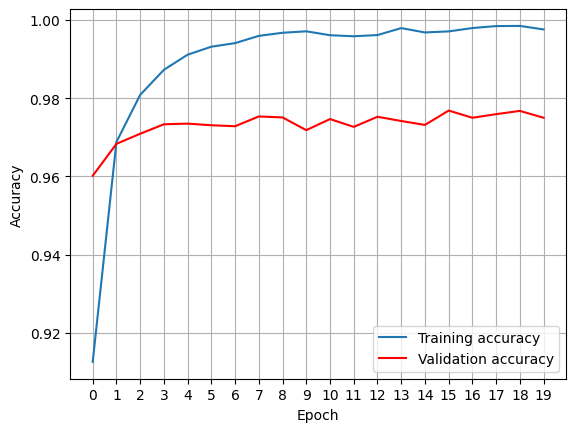

313/313 [==============================] - 0s 442us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



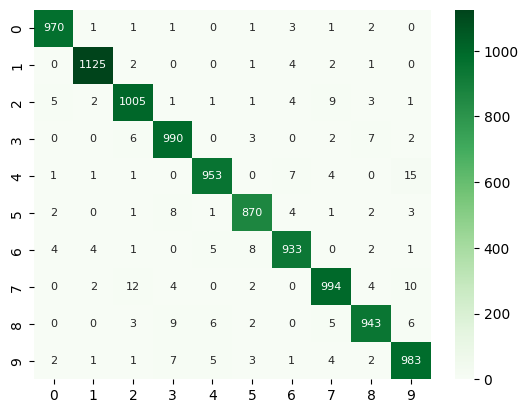

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
digits_benchmark(model)

Variant with BatchNormalization applied before the activation function:  

> nb: BatchNormalisation's $\beta$ is replacing bias in this variant.

In [7]:
model = Sequential([
    Flatten(input_shape=input_shape),
    BatchNormalization(),
    
    Dense(units=128, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(units=256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(units=10, activation='softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 128)               100352    
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 256)              

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 128)               100352    
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 256)              

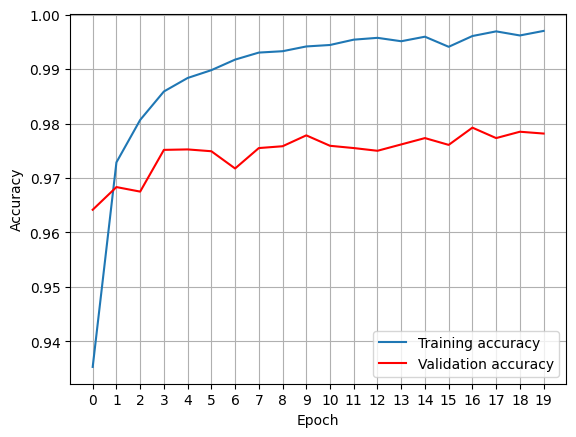

313/313 [==============================] - 0s 399us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



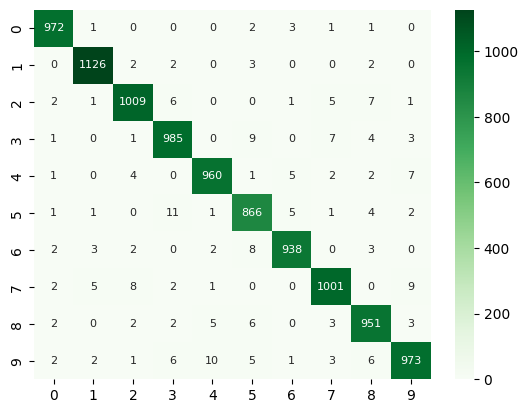

In [8]:
opt = Adam(learning_rate=0.005, clipnorm=1.0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
digits_benchmark(model)